#### Prever se o cliente ira aceitar a ultima campanha de marketing

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Define functions 

def load_data(path):
    '''
    carregar dados
    '''
    
    df = pd.read_csv(path, sep = ';')
    print('Data loaded successfully')
    
    return df

def visualize_df_data(df):   
    '''
    visualizar tipo de dados
    '''

    print("preview dos dados")
    print(df.head(5))
    print("tipo dos dados")
    print(df.info())

def get_processed_df(df, columns_to_drop):
    '''
    remover colunas não utilizadas na analise
    '''
    
    df_processed = df.drop(columns_to_drop, axis=1) #drop colunas desnecessarias
    
    return df_processed

def get_df_stats(df):
    '''
    monstrar caracteristicas dos dados
    '''

    print("colunas utilizadas")
    print(df.info())

    print("caracteristica das variaveis")
    df.select_dtypes('number').describe().transpose() #caracteristica das variaveis numericas

    print("visulizar colunas com valores faltantes")
    print(df.isna().sum()) #Income com valores faltantes
    
def get_hist_plot(df, colunm_name):
    '''
    plotar histograma
    '''
    sns.set(font_scale=0.6)
    for i in range(len(colunm_name)):
        plt.subplot(int(np.ceil(len(colunm_name)/2)), 2, i+1)
        sns.histplot(x = df[colunm_name[i]])
    plt.show()

def get_scale_df(df):
    '''
    normatização das colunas
    '''
    min_max_scaler = MinMaxScaler()
    df[df.columns] = min_max_scaler.fit_transform(df)
    print(df.head(5))
        
    return df

def get_teste_train(df, col, split_test_size):
    '''
    separar dataset de teste e treino
    '''
    features = df.columns.drop(col)
    target = [col]

    X = df[features].values
    y = df[target].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state=8)

    print('Variáveis explicativas de treino:', X_train.shape)
    print('Variáveis explicativas de teste:', X_test.shape)
    print('Variável alvo de treino:', y_train.shape)
    print('Variável alvo de teste:', y_test.shape)

    fscaler = MinMaxScaler()
    X_train = fscaler.fit_transform(X_train)
    X_test = fscaler.transform(X_test)
    return X_train, X_test, y_train, y_test

def get_model(model, X_train, y_train, X_test, y_test):
    '''
    usar modelo de classificação e calcular metricas
    '''
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    print('acc: ', accuracy_score(y_test, predictions))

    matrix = confusion_matrix(y_test, predictions)
    sns.heatmap(matrix, annot=True, fmt='', cbar = False)
    plt.xlabel("Predicted Result")
    plt.ylabel("Actual Result")
    plt.show()

    #tree.plot_tree(clf)
    #plt.show()

#### Carregamento de dados

In [3]:
path = 'https://github.com/knmukai/retail-customer-segmentation-analysis/blob/main/marketing_campaign.csv?raw=true'
df = load_data(path)

Data loaded successfully


In [4]:
visualize_df_data(df)

preview dos dados
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain 

#### Pré-processamento dos dados

In [5]:
# remover colunas não utilizadas
columns_to_drop = ['ID', 'Dt_Customer', 'Recency', 'Complain', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
'AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact', 'NumDealsPurchases','NumWebPurchases', 'Z_Revenue', 'MntWines', 'MntFruits', 'MntMeatProducts',
'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

df_processed = get_processed_df(df, columns_to_drop)

In [6]:
get_df_stats(df_processed)

colunas utilizadas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year_Birth      2240 non-null   int64  
 1   Education       2240 non-null   object 
 2   Marital_Status  2240 non-null   object 
 3   Income          2216 non-null   float64
 4   Kidhome         2240 non-null   int64  
 5   Teenhome        2240 non-null   int64  
 6   Response        2240 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 122.6+ KB
None
caracteristica das variaveis
visulizar colunas com valores faltantes
Year_Birth         0
Education          0
Marital_Status     0
Income            24
Kidhome            0
Teenhome           0
Response           0
dtype: int64


In [7]:
print("substituir status marital Alone, Absurd e YOLO por Single e Widow por Divorced")
df_processed['Marital_Status'].replace(['Alone','Absurd','YOLO'], 'Single', inplace=True)
df_processed['Marital_Status'].replace(['Widow'], 'Divorced', inplace=True)
print(df_processed['Marital_Status'].value_counts())

substituir status marital Alone, Absurd e YOLO por Single e Widow por Divorced
Married     864
Together    580
Single      487
Divorced    309
Name: Marital_Status, dtype: int64


In [8]:
print('sinalizar apenas se possui ou não filhos')
df_processed['Childhome'] = np.where((df_processed['Kidhome'] == 0) | (df_processed['Teenhome'] == 0), 0, 1)
df_processed = df_processed.drop(['Kidhome', 'Teenhome'], axis=1) #drop colunas de filhos
print(df_processed['Childhome'].value_counts())

sinalizar apenas se possui ou não filhos
0    1813
1     427
Name: Childhome, dtype: int64


In [9]:
# media da renda por nivel de educacao
df_processed['Income'].fillna(df_processed.groupby('Education')['Income'].transform('mean'), inplace = True) #substituir valores na pela media por Education

In [10]:
# remoção de outliers
print("qtd de registros antes da remocao de outliers:"+str(len(df_processed)))
df_processed = df_processed[(df_processed['Year_Birth']>=1940) & (df_processed['Income']<=100000)].reset_index()
print("qtd de registros antes da remocao de outliers:"+str(len(df_processed)))

qtd de registros antes da remocao de outliers:2240
qtd de registros antes da remocao de outliers:2224


In [11]:
# tranformar ano de nascimento em idade
df_processed.insert(6,'age', date.today().year-df_processed['Year_Birth'])
df_processed = df_processed.drop(['Year_Birth'], axis=1) 
df_processed = df_processed.drop(['index'], axis=1)  #remove index

In [12]:
print('engajamento na ultima campanha')
print(df_processed['Response'].value_counts())

engajamento na ultima campanha
0    1894
1     330
Name: Response, dtype: int64


In [13]:
print('tranformar variaveis categoricas em dummies')
df_dummies = pd.get_dummies(data=df_processed, drop_first=True)
print(df_dummies.head(5))

tranformar variaveis categoricas em dummies
    Income  Response  age  Childhome  Education_Basic  Education_Graduation  \
0  58138.0         1   65          0                0                     1   
1  46344.0         0   68          1                0                     1   
2  71613.0         0   57          0                0                     1   
3  26646.0         0   38          0                0                     1   
4  58293.0         0   41          0                0                     0   

   Education_Master  Education_PhD  Marital_Status_Married  \
0                 0              0                       0   
1                 0              0                       0   
2                 0              0                       0   
3                 0              0                       0   
4                 0              1                       1   

   Marital_Status_Single  Marital_Status_Together  
0                      1                        0  
1   

#### Treino e avaliação dos modelos

In [14]:
target_col = 'Response'
test_size = 0.3

X_train, X_test, y_train, y_test = get_teste_train(df_dummies, target_col, test_size)

Variáveis explicativas de treino: (1556, 10)
Variáveis explicativas de teste: (668, 10)
Variável alvo de treino: (1556, 1)
Variável alvo de teste: (668, 1)


decision tree classifier
acc:  0.7934131736526946


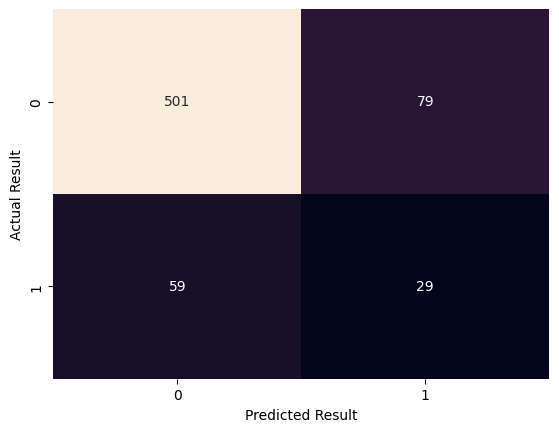

In [15]:
print('decision tree classifier')
dtc = DecisionTreeClassifier(random_state=0)

get_model(dtc, X_train, y_train, X_test, y_test)

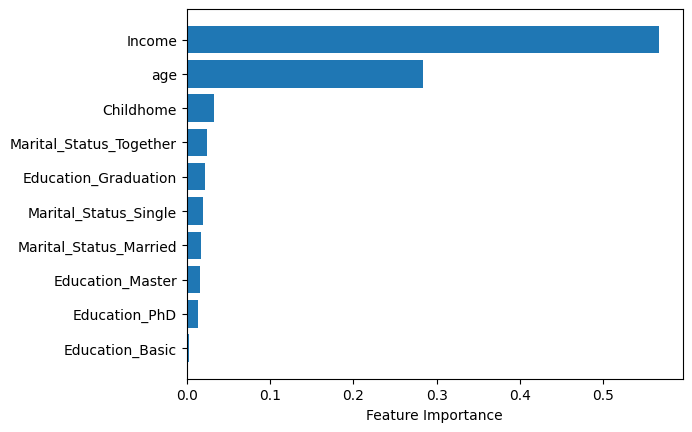

age e income são as features mais relevantes


In [16]:
importances = dtc.feature_importances_
sorted_idx = dtc.feature_importances_.argsort()

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[sorted_idx])
ax.set_yticks(range(len(importances)))
ax.set_yticklabels(np.array(df_dummies.columns.drop('Response'))[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()
print('age e income são as features mais relevantes')

Nearest Neighbors Classification
acc:  0.8458083832335329


C:\Users\karla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


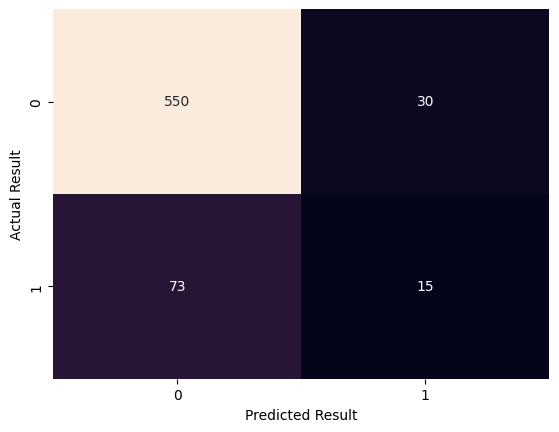

In [17]:
print('Nearest Neighbors Classification')
knc = KNeighborsClassifier() #default n_neighbor=5

get_model(knc, X_train, y_train, X_test, y_test)

In [18]:
print('metodo Nearest Neighbors Classification teve melhor precisão')

metodo Nearest Neighbors Classification teve melhor precisão
